Fold 1 accuracy: 0.967
Fold 2 accuracy: 0.967
Fold 3 accuracy: 0.967
Fold 4 accuracy: 0.967
Fold 5 accuracy: 1.000

Mean accuracy over 5 folds: 0.973
Std deviation: 0.013


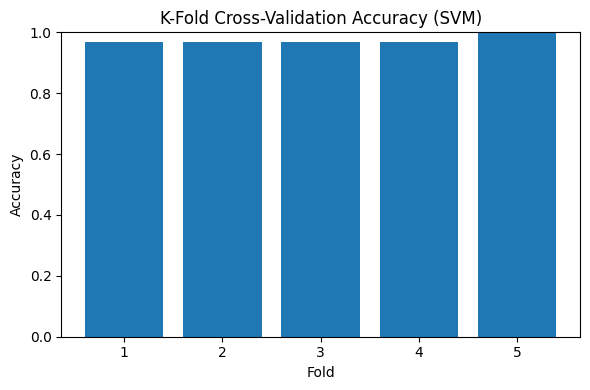

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   # add this

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

# Load data
df = pd.read_csv(r"D:\Coding\MSc\3rd sem\Datasets\AI&ML_Dataset\Iris.csv")

# Encode labels
le = LabelEncoder()
y = le.fit_transform(df['Species']).astype(int)

# Features
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

# Scale features once (using all data for simplicity)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Fold configuration
n_splits = 5                             # define once
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

scores = []

for fold, (train_idx, test_idx) in enumerate(kf.split(X_scaled), start=1):
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    model = SVC(kernel='linear', random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    scores.append(acc)
    print(f"Fold {fold} accuracy: {acc:.3f}")

print(f"\nMean accuracy over {n_splits} folds: {np.mean(scores):.3f}")
print(f"Std deviation: {np.std(scores):.3f}")

# ---- Graph part ----
folds = np.arange(1, n_splits + 1)       # define folds

plt.figure(figsize=(6, 4))
plt.bar(folds, scores)
plt.xticks(folds)
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('K-Fold Cross-Validation Accuracy (SVM)')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


# OR


Mean accuracy over 5 folds: 0.967
Std deviation: 0.030


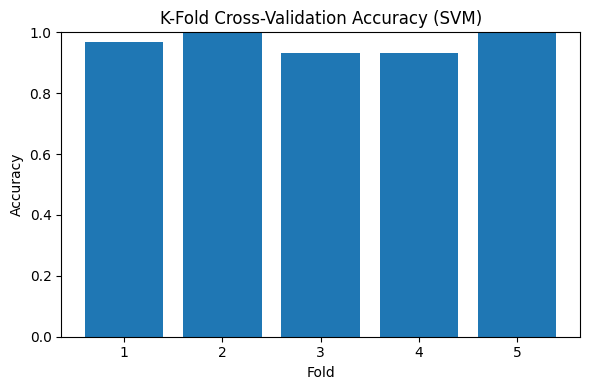

In [2]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt # add this for the graph part

# Load data
df = pd.read_csv(r"D:\Coding\MSc\3rd sem\Datasets\AI&ML_Dataset\Iris.csv")

# Encode labels
le = LabelEncoder()
y = le.fit_transform(df['Species']).astype(int)

# Features
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

# Scale features once
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Fold configuration
n_splits = 5
model = SVC(kernel='linear', random_state=42)

# Use cross_val_score for built-in K-Fold cross-validation
scores = cross_val_score(model, X_scaled, y, cv=n_splits)

print(f"\nMean accuracy over {n_splits} folds: {np.mean(scores):.3f}")
print(f"Std deviation: {np.std(scores):.3f}")

# Graph part (optional, as in original code)
folds = np.arange(1, n_splits + 1)
plt.figure(figsize=(6, 4))
plt.bar(folds, scores)
plt.xticks(folds)
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('K-Fold Cross-Validation Accuracy (SVM)')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()